# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [3]:
import re
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
# Load data
df = pd.read_csv('https://raw.githubusercontent.com/narendranathreddy333/DATA/main/Constraint_Train.csv')
data = df.tweet.values.tolist()

# Preprocess data
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]  # Remove emails
data = [re.sub('\s+', ' ', sent) for sent in data]       # Remove new line characters
data = [re.sub("\'", "", sent) for sent in data]         # Remove single quotes

# Prepare stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Tokenize words and clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))

# Create Bigram and Trigram Models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Set up functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Call functions
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary and Corpus needed for Topic Modeling
id2word = corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# Find the optimal number of topics based on coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Use the function to compute coherence values
# Note: This can take some time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

# Choose the model with the highest coherence score
max_coherence_val = max(coherence_values)
optimal_model_index = coherence_values.index(max_coherence_val)
optimal_model = model_list[optimal_model_index]
optimal_num_topics = 2 + 6 * optimal_model_index

# Summarize the topics
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.036*"covid" + 0.019*"coronavirus" + 0.011*"say" + 0.010*"people" + 0.007*"pandemic" + 0.007*"claim" + 0.006*"vaccine" + 0.006*"spread" + 0.006*"virus" + 0.006*"get"')
(1, '0.057*"case" + 0.042*"covid" + 0.030*"test" + 0.026*"report" + 0.023*"state" + 0.022*"death" + 0.020*"number" + 0.019*"new" + 0.015*"confirm" + 0.015*"total"')


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [2]:
# Write your code here
import re
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel, LsiModel
import spacy
import pandas as pd
from gensim.utils import simple_preprocess
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/narendranathreddy333/DATA/main/Constraint_Train.csv')
data = df.tweet.values.tolist()

# Preprocess data
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]  # Remove emails
data = [re.sub('\s+', ' ', sent) for sent in data]       # Remove new line characters
data = [re.sub("\'", "", sent) for sent in data]         # Remove single quotes

# Prepare stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Tokenize words and clean-up text
data_words = list(simple_preprocess(str(doc), deacc=True) for doc in data)

# Create Bigram and Trigram Models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Set up functions for stopwords, bigrams, and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Call functions
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary and Corpus needed for Topic Modeling
id2word = corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# Find the optimal number of topics based on coherence score for LSA
def compute_coherence_values_lsa(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Use the function to compute coherence values
model_list, coherence_values = compute_coherence_values_lsa(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

# Choose the model with the highest coherence score
max_coherence_val = max(coherence_values)
optimal_model_index = coherence_values.index(max_coherence_val)
optimal_model = model_list[optimal_model_index]
optimal_num_topics = 2 + 6 * optimal_model_index

# Summarize the topics
topics = optimal_model.show_topics(num_topics=optimal_num_topics, num_words=10)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.618*"covid" + 0.525*"case" + 0.202*"report" + 0.165*"death" + 0.163*"new" + 0.160*"confirm" + 0.155*"state" + 0.134*"coronavirus" + 0.133*"number" + 0.122*"test"')
(1, '-0.617*"case" + 0.453*"covid" + 0.252*"coronavirus" + -0.174*"confirm" + 0.152*"say" + -0.142*"total" + -0.129*"report" + 0.123*"video" + 0.120*"show" + 0.120*"claim"')


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [1]:
!pip install gensim spacy nltk pyldavis
!python -m spacy download en_core_web_sm
!pip install "numpy<1.20"  # If using pyLDAvis to avoid compatibility issues

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 30.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. 

In [13]:
# Ensure you have all required packages installed
!pip install gensim spacy nltk pyldavis pandas
!python -m spacy download en_core_web_sm

# Import necessary libraries
import pandas as pd
import spacy
import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import numpy as np

# Download NLTK stopwords
nltk.download('stopwords')

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/narendranathreddy333/DATA/main/Constraint_Train.csv')
data = df.tweet.values.tolist()

# Preprocess data
def preprocess(documents):
    spacy_nlp = spacy.load('en_core_web_sm')
    stop_words = stopwords.words('english')
    texts = []
    for doc in documents:
        doc = spacy_nlp(doc.lower())
        texts.append([token.lemma_ for token in doc if token.lemma_ not in stop_words and token.is_alpha])
    return texts

processed_data = preprocess(data)

# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_data)
corpus = [id2word.doc2bow(text) for text in processed_data]

# Function to compute coherence values for a range of number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit + 1, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values (this may take some time)
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=processed_data, start=2, limit=8, step=1)

# Select the model with the highest coherence and print the topics
optimal_model = model_list[np.argmax(coherence_values)]
optimal_model.print_topics()

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.231927 -0.008469       1        1  20.871432
3      0.016607 -0.239988       2        1  19.497952
4     -0.269150  0.084509       3        1  17.744883
2      0.139298  0.132252       4        1  16.118530
1      0.166516 -0.056162       5        1  13.723884
0      0.178656  0.087859       6        1  12.043318, topic_info=             Term         Freq        Total Category  logprob  loglift
46           case  1844.000000  1844.000000  Default  30.0000  30.0000
41           test  1173.000000  1173.000000  Default  29.0000  29.0000
19          state   910.000000   910.000000  Default  28.0000  28.0000
9          report   889.000000   889.000000  Default  27.0000  27.0000
89    coronavirus  1252.000000  1252.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1446        viral    32.779748    66.084509   Topic6  -5.8235   1.4155
100          plan    32.353878    64.309144   Topic6  -5.8366   1.4297
55            new    39.838748  1053.591213   Topic6  -5.6285  -1.1585
176           die    33.620678   169.468717   Topic6  -5.7982   0.4991
247           due    33.245478   168.432108   Topic6  -5.8094   0.4940

[418 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
256       5  0.424758        I
256       6  0.573251        I
908       5  0.978031   access
726       3  0.965285  acquire
442       3  0.996219   active
...     ...       ...      ...
521       1  0.849665     york
521       4  0.144829     york
615       4  0.989083  youtube
693       3  0.997196  zealand
2965      6  0.929565     zinc

[686 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 3, 2, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


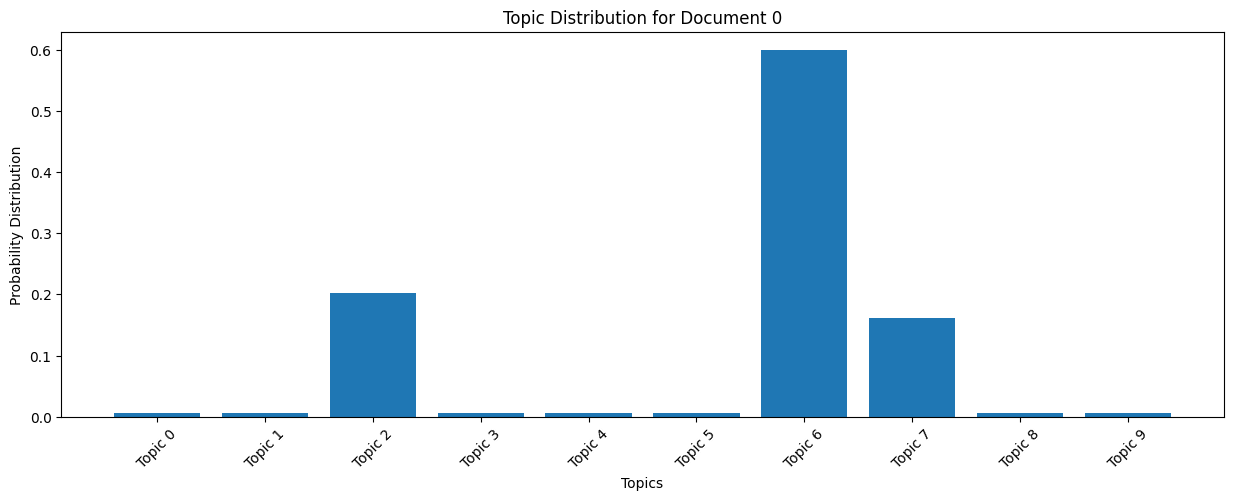

Processed Tweet: cdc currently report death general discrepancy death count different source small explicable death toll stand roughly people today
Topic 6 with probability 59.92%
Keywords: state, report, case, test, death
Topic 2 with probability 20.18%
Keywords: case, new, confirm, report, total
Topic 7 with probability 16.20%
Keywords: risk, people, amp, spread, health


In [16]:
import pandas as pd
import spacy
import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
from nltk.corpus import stopwords
import nltk
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Ensure the download of stopwords
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/narendranathreddy333/DATA/main/Constraint_Train.csv')
data = df.tweet.values.tolist()

# Preprocess data
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
stop_words = stopwords.words('english')

def preprocess(documents):
    texts = []
    for doc in documents:
        doc = nlp(doc.lower())
        texts.append([token.lemma_ for token in doc if token.lemma_ not in stop_words and token.is_alpha])
    return texts

processed_data = preprocess(data)

# Create Dictionary and Corpus
id2word = corpora.Dictionary(processed_data)
corpus = [id2word.doc2bow(text) for text in processed_data]

# Build LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=10)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=10)
vis

# Analyze topic distribution for a specific document
doc_index = 0  # change this to analyze different documents
doc = corpus[doc_index]

# Get topic distribution for the document
doc_distribution = lda_model.get_document_topics(doc, minimum_probability=0.0)

# Plot
plt.figure(figsize=(15, 5))
plt.bar(range(len(doc_distribution)), [prob for _, prob in doc_distribution], tick_label=[f'Topic {i}' for i, _ in doc_distribution])
plt.xlabel('Topics')
plt.ylabel('Probability Distribution')
plt.title(f'Topic Distribution for Document {doc_index}')
plt.xticks(rotation=45)
plt.show()

# Print the processed tweet and its most relevant topics
print(f"Processed Tweet: {' '.join(processed_data[doc_index])}")
for topic, prob in sorted(doc_distribution, key=lambda x: x[1], reverse=True)[:3]:  # top 3 topics
    print(f"Topic {topic} with probability {prob*100:.2f}%")
    print(f"Keywords: {', '.join([word for word, _ in lda_model.show_topic(topic, topn=5)])}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [5]:
# Install BERTopic
!pip install bertopic

# Import necessary libraries
from bertopic import BERTopic
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/narendranathreddy333/DATA/main/Constraint_Train.csv"
data = pd.read_csv(url)
documents = data['tweet'].tolist()  # Adjust the column name as per your dataset

# Create and fit BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probabilities = topic_model.fit_transform(documents)

# Get an overview of the generated topics
topic_info = topic_model.get_topic_info()
print(topic_info.head())

# Summarize topics by printing top words for the first few topics
for topic_num in range(topic_info.shape[0]-1):  # Adjust the range as needed
    if topic_num == -1:  # Skip -1 as it represents outliers
        continue
    print(f"Topic {topic_num}: {topic_model.get_topic(topic_num)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2024-03-30 00:29:30,781 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/201 [00:00<?, ?it/s]

2024-03-30 00:33:27,705 - BERTopic - Embedding - Completed ✓
2024-03-30 00:33:27,711 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 00:33:43,968 - BERTopic - Dimensionality - Completed ✓
2024-03-30 00:33:43,970 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)
2024-03-30 00:33:48,327 - BERTopic - Cluster - Completed ✓
2024-03-30 00:33:48,336 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 00:33:49,391 - BERTopic - Representation - Completed ✓


   Topic  Count                                Name  \
0     -1   2153                -1_the_to_covid19_of   
1      0    266  0_lockdown_restrictions_uk_england   
2      1    193              1_masks_mask_wear_face   
3      2    146            2_test_testing_pcr_tests   
4      3    120       3_italy_italian_died_hospital   

                                      Representation  \
0  [the, to, covid19, of, and, coronavirus, in, i...   
1  [lockdown, restrictions, uk, england, boris, j...   
2  [masks, mask, wear, face, wearing, you, spread...   
3  [test, testing, pcr, tests, positive, antibody...   
4  [italy, italian, died, hospital, video, money,...   

                                 Representative_Docs  
0  [Update from the @minhealthnz ​ There are no n...  
1  [9/10 New lockdown restrictions should come in...  
2  [Cloth face coverings may help prevent the spr...  
3  [Antibodies for the common cold produce a posi...  
4  [A viral video purportedly from Italy shows a ...  
To

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
Among LDA, LSA, lda2vec, and BERTopic, the choice of the "best" topic modeling algorithm depends on our project's needs:

LDA is great for general use, offering a good mix of interpretability and efficiency.
LSA is fast, suited for large datasets but might lack topic clarity.
lda2vec combines probabilistic modeling with embeddings for depth but is complex.
BERTopic leverages advanced NLP for nuanced topics, ideal for deep insights but computationally intensive.

BERTopic stands out for capturing rich language nuances, making it a strong choice for in-depth analysis
where computational resources are not a constraint.

'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''

This exercise was a bit difficult but very helpful for my project. Working with various topic modeling
algorithms like LDA, LSA, lda2vec, and BERTopic offered a deep dive into text data processing,
enhancing my understanding of feature extraction. Despite the challenges, particularly in grasping the
nuances of each method, the hands-on experience was invaluable. It solidified my practical skills in NLP,
directly contributing to my project and broadening my expertise in the field.


'''